## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import bartlett
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [3]:
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [4]:
# answer below:
feature_df = reviews.copy()
feature_df.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis =1, inplace=True)

feature_df.dropna(inplace=True)

feature_df.drop(feature_df[feature_df['Content Rating']=='Unrated'].index, inplace=True)
feature_df.drop(feature_df[feature_df['Content Rating']=='Adults only 18+'].index, inplace=True)

feature_df = pd.concat([feature_df,
                        pd.get_dummies(feature_df['Type'], prefix='type', drop_first=True)],
                       axis=1)

feature_df = pd.concat([feature_df,
                        pd.get_dummies(feature_df['Content Rating'], prefix='ContentRating', drop_first=True)],
                       axis=1)

feature_df.drop(['Type','Content Rating'], axis=1, inplace=True)

feature_df['Reviews'] = pd.to_numeric(feature_df['Reviews'], errors='coerce', downcast='integer')
feature_df['Price'] = feature_df['Price'].str.strip('$')
feature_df['Price'] = feature_df['Price'].astype(float)

feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rating                      9362 non-null   float64
 1   Reviews                     9362 non-null   int32  
 2   Price                       9362 non-null   float64
 3   type_Paid                   9362 non-null   uint8  
 4   ContentRating_Everyone 10+  9362 non-null   uint8  
 5   ContentRating_Mature 17+    9362 non-null   uint8  
 6   ContentRating_Teen          9362 non-null   uint8  
dtypes: float64(2), int32(1), uint8(4)
memory usage: 292.6 KB


In [5]:
feature_df.describe()

,Rating,Reviews,Price,type_Paid,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen
count,9362.000000,9.362000e+03,9362.000000,9362.000000,9362.000000,9362.000000,9362.000000
mean,4.191733,5.142607e+05,0.961338,0.069109,0.042405,0.049242,0.115787
std,0.515285,3.144697e+06,15.819951,0.253653,0.201523,0.216384,0.319987
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.860000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,5.916500e+03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,8.159625e+04,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,400.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
scaled_df = feature_df.copy()
quantile = QuantileTransformer(output_distribution='normal')
for col in scaled_df.columns:
  scaled_df[col] = quantile.fit_transform(scaled_df[[col]])

In [7]:
X = scaled_df.drop(['Rating'], axis=1)
y = scaled_df['Rating']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [9]:
#answer below:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.09
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.43e-13
Time:                        23:07:54   Log-Likelihood:                -12507.
No. Observations:                7489   AIC:                         2.503e+04
Df Residuals:                    7482   BIC:                         2.508e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [10]:
lrm = linear_model.LinearRegression()

lrm.fit(X_train, y_train)
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

errors = y_test - y_preds

print(f'Coefs: {lrm.coef_}')
print(f'Intercept: {lrm.intercept_}')
print(f'Mean of Errors: {np.mean(errors):.3f}')

Coefs: [ 0.         -0.07801119 -0.48327668  0.35164736  0.00353778 -0.01719399
  0.00095808]
Intercept: -0.6807357973239347
Mean of Errors: -0.012


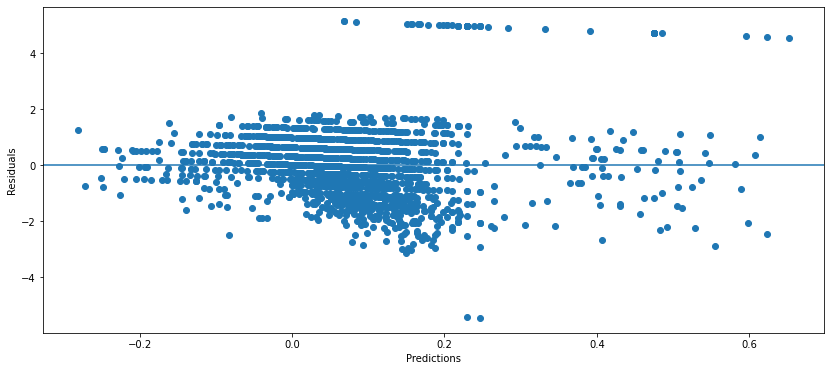

In [11]:
plt.figure(figsize=(14,6))
plt.scatter(y_preds, errors)
plt.axhline(y=0)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [12]:
print(bartlett(y_preds, errors))
print(levene(y_preds, errors))

BartlettResult(statistic=6208.294861555727, pvalue=0.0)
LeveneResult(statistic=1579.9269005109556, pvalue=1.4354830801698106e-288)


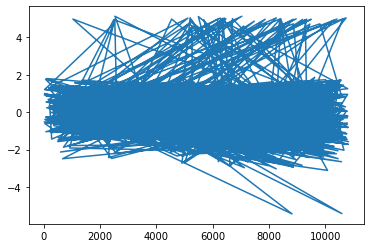

In [13]:
plt.plot(errors)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


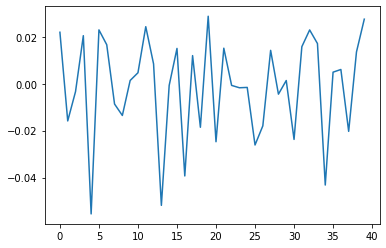

In [14]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

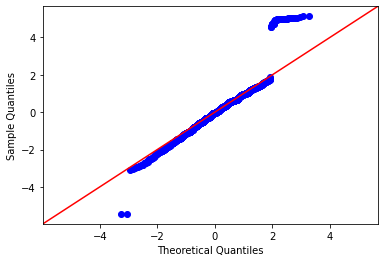

In [15]:
import pylab

sm.qqplot(errors, line='45')
pylab.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
          index=X_train.columns)

const                         271.523381
Reviews                         1.074321
Price                         312.132477
type_Paid                     312.281381
ContentRating_Everyone 10+      1.028901
ContentRating_Mature 17+        1.013813
ContentRating_Teen              1.036686
dtype: float64

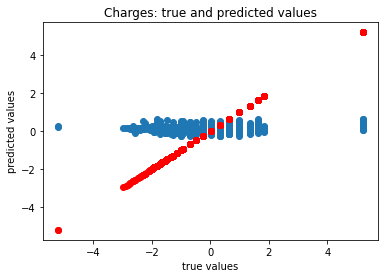

In [17]:
plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

**The model is heteroscedastic, the errors are normally distributed and there is multicollinearity between `Price` and `type_Paid`**

**Furthermore, the p-value for 2 of the `Content Rating` values is greater than 0.05. Only the `Mature 17+` is significant.**



Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [18]:
X_train.columns

Index(['const', 'Reviews', 'Price', 'type_Paid', 'ContentRating_Everyone 10+',
       'ContentRating_Mature 17+', 'ContentRating_Teen'],
      dtype='object')

In [19]:
#answer below:
X_train_improved = X_train.drop(['type_Paid', 'ContentRating_Everyone 10+', 'ContentRating_Teen'], axis=1)
X_test_improved = X_test.drop(['type_Paid', 'ContentRating_Everyone 10+', 'ContentRating_Teen'], axis=1)

results = sm.OLS(y_train, X_train_improved).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     19.92
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.44e-13
Time:                        23:07:55   Log-Likelihood:                -12513.
No. Observations:                7489   AIC:                         2.503e+04
Df Residuals:                    7485   BIC:                         2.506e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [20]:
pd.Series([variance_inflation_factor(X_train_improved.values, i) for i in range(X_train_improved.shape[1])],
          index=X_train_improved.columns)

const                       12.547428
Reviews                      1.035579
Price                        1.035438
ContentRating_Mature 17+     1.001719
dtype: float64

In [21]:
lrm = linear_model.LinearRegression()

lrm.fit(X_train_improved, y_train)

y_preds_improved = results.predict(X_test_improved)
errors_improved = y_test - y_preds_improved
print(f'Coefs: {lrm.coef_}')
print(f'Intercept: {lrm.intercept_}')
print(f'Mean of errors: {np.mean(errors_improved)}')

Coefs: [ 0.         -0.07799542  0.0286802  -0.01772474]
Intercept: 0.13049761407156962
Mean of errors: -0.013473324970193264


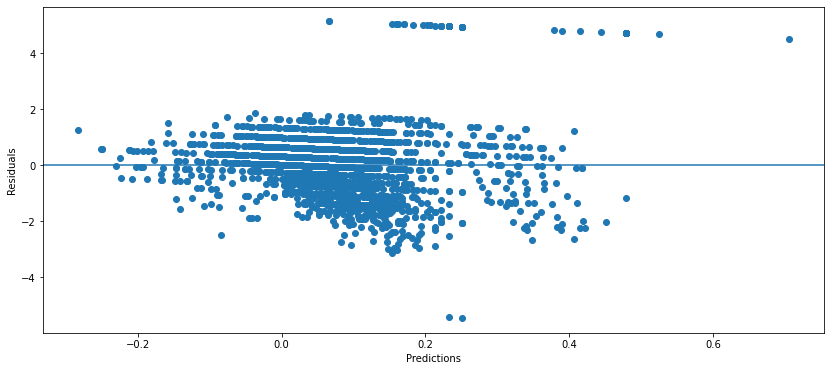

In [22]:
plt.figure(figsize=(14,6))
plt.scatter(y_preds_improved, errors_improved)
plt.axhline(y=0)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

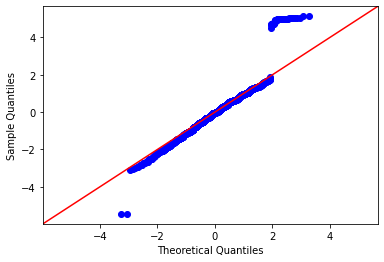

In [23]:
sm.qqplot(errors_improved, line='45')
pylab.show()

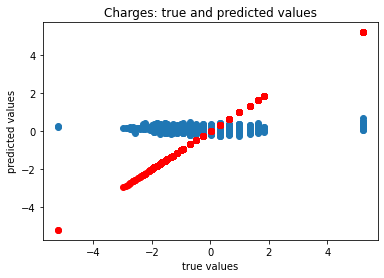

In [24]:
plt.scatter(y_test, y_preds_improved)
plt.scatter(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

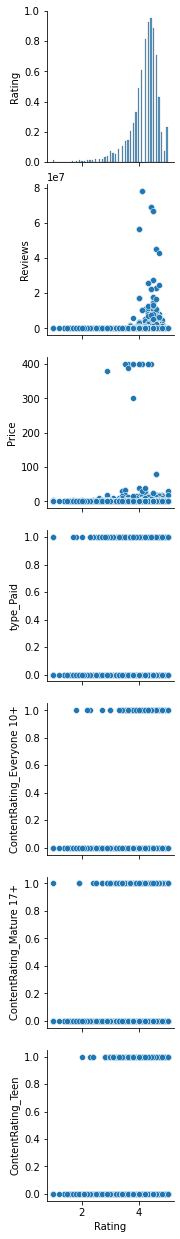

In [25]:
# answer below:
sns.pairplot(data= feature_df, x_vars=['Rating'], y_vars=feature_df.columns)

plt.tight_layout
plt.show()

None of these features are a good indictator for Rating scores, except maybe the non-zero values for `Price` and apps with higher numbers of `Reviews`, as they tend to have a positive rating for these values. 

What data processing could you do to improve this model? Experiment.

Instead of trying to predict Rating on a scale of 1 to 5, building a model that predicts 5-stars or 1-star ratings could be more practical. So, look at the extremes. This will also help with the bias of the model, since almost all data points are approximately the average rating. 